In [1]:
import sys
sys.path.append("../")  # path contains python_file.py

In [2]:
import iris
import numpy as np
import scipy.stats

from helpers_compare_ISIMIP_with_our_code import *

In [3]:
%load_ext autoreload
%autoreload 2

# Get ISIMIP

In [4]:
!wget https://zenodo.org/record/6758997/files/isimip3basd-master.tar.gz
!tar -xf isimip3basd-master.tar.gz

--2022-07-03 11:17:19--  https://zenodo.org/record/6758997/files/isimip3basd-master.tar.gz
Resolving zenodo.org (zenodo.org)... 137.138.76.77
Connecting to zenodo.org (zenodo.org)|137.138.76.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12112564 (12M) [application/octet-stream]
Saving to: ‘isimip3basd-master.tar.gz.2’

isimip3basd-master. 100%[===================>]  11,55M  6,01MB/s    in 1,9s    

2022-07-03 11:17:22 (6,01 MB/s) - ‘isimip3basd-master.tar.gz.2’ saved [12112564/12112564]



# Run ISIMIP application example (`application_example.sh`)

In [5]:
!mkdir isimip3basd-master/data/debiased_models
!rm isimip3basd-master/data/debiased_models/tas_sim-fut-basd_coarse_2065-2100.nc

!python -u isimip3basd-master/code/bias_adjustment.py \
--n-processes 5 \
--randomization-seed 0 \
--variable tas \
--distribution normal \
--trend-preservation additive \
--detrend 1 \
--halfwin-upper-bound-climatology 0 \
-o isimip3basd-master/data/tas_obs-hist_coarse_1979-2014.nc \
-s isimip3basd-master/data/tas_sim-hist_coarse_1979-2014.nc \
-f isimip3basd-master/data/tas_sim-fut_coarse_2065-2100.nc \
-b isimip3basd-master/data/debiased_models/tas_sim-fut-basd_coarse_2065-2100.nc \
--n-quantiles 15000 #\
#--max-change-factor 100000. \
#--max-adjustment-factor 50000.
#--adjust-p-values 1
#--if-all-invalid-use \
#--trendless-bound-frequency \
#--lower-bound , 0.\
#--lower-threshold , 0.1 \
#--upper-bound , \
#--upper-threshold , \
#--unconditional-ccs-transfer\
#--step-size 1 \


mkdir: cannot create directory ‘isimip3basd-master/data/debiased_models’: File exists
checking inputs ...
adjusting at location (lon, lat) ...
isimip3basd-master/code/bias_adjustment.py:664: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = dataset[item[2]][item[3]]
(0, 0)
(0, 1)
(1, 0)
(1, 1)
/home/jakobwes/Desktop/ESoWC/isimipy/notebooks/isimip3basd-master/code/utility_functions.py:1164: UserWarning: due to little input data: reducing n_quantiles to 1115
  warnings.warn(msg)
/home/jakobwes/Desktop/ESoWC/isimipy/notebooks/isimip3basd-master/code/utility_functions.py:1164: UserWarning: due to little input data: reducing n_quantiles to 1115
  warnings.warn(msg)
/home/

# Testing data ISIMIP

In [12]:
from PACKAGE_NAME.debias import ISIMIP

In [13]:
obs, cm_hist, cm_future, dates = read_in_and_preprocess_isimip_testing_data_with_dates("tas")

In [14]:
debiaser = ISIMIP.from_variable("tas")
debiaser.running_window_mode = False

debiased_values = debiaser.apply(obs, cm_hist, cm_future, **dates)

----- Running debiasing -----


100%|██████████| 4/4 [00:01<00:00,  3.72it/s]


In [15]:
debiased_values_isimip, dates_debiased_values_isimip = read_in_debiased_testing_data_with_dates("tas")

In [16]:
diff = debiased_values-debiased_values_isimip
diff

array([[[ 0.00000000e+00, -6.10351562e-05],
        [ 0.00000000e+00,  3.05175781e-05]],

       [[ 0.00000000e+00, -3.05175781e-05],
        [ 3.05175781e-05,  0.00000000e+00]],

       [[ 0.00000000e+00, -6.10351562e-05],
        [ 3.05175781e-05,  0.00000000e+00]],

       ...,

       [[ 3.05175781e-05,  0.00000000e+00],
        [ 3.05175781e-05,  3.05175781e-05]],

       [[ 3.05175781e-05,  0.00000000e+00],
        [ 3.05175781e-05,  0.00000000e+00]],

       [[ 0.00000000e+00, -3.05175781e-05],
        [ 0.00000000e+00,  3.05175781e-05]]])

In [17]:
-np.sort(-np.abs(diff), axis = None)[0:100]

array([0.00494385, 0.00469971, 0.0045166 , 0.00448608, 0.00393677,
       0.0032959 , 0.00326538, 0.00320435, 0.00311279, 0.00308228,
       0.00302124, 0.00296021, 0.00292969, 0.00289917, 0.00283813,
       0.00265503, 0.00262451, 0.00262451, 0.00262451, 0.00250244,
       0.00250244, 0.00247192, 0.00244141, 0.00244141, 0.00244141,
       0.00241089, 0.00238037, 0.00238037, 0.00234985, 0.00234985,
       0.00234985, 0.00234985, 0.00234985, 0.00231934, 0.00231934,
       0.00228882, 0.00228882, 0.0022583 , 0.0022583 , 0.00222778,
       0.00219727, 0.00219727, 0.00219727, 0.00216675, 0.00216675,
       0.00216675, 0.00216675, 0.00216675, 0.00213623, 0.00213623,
       0.00213623, 0.00213623, 0.00213623, 0.00213623, 0.00210571,
       0.00210571, 0.00210571, 0.00210571, 0.00210571, 0.00210571,
       0.00210571, 0.00210571, 0.0020752 , 0.00204468, 0.00204468,
       0.00204468, 0.00204468, 0.00201416, 0.00201416, 0.00201416,
       0.00201416, 0.00201416, 0.00198364, 0.00198364, 0.00198

In [17]:
diff_0_0 = diff[:, 0, 0]
diff_1_0 = diff[:, 1, 0]
diff_0_1 = diff[:, 0, 1]
diff_1_1 = diff[:, 1, 1]

In [18]:
location_diff = diff_0_0
np.sum(location_diff < 1e-4)/location_diff.size

0.9818983875874657

In [21]:
np.sum(np.isclose(debiased_values,debiased_values_isimip))/debiased_values.size

0.9997147855187101

In [19]:
np.sum(diff < 1e-4)/diff.size

0.986271676300578

In [20]:
import matplotlib.pyplot as plt

(0, 0)


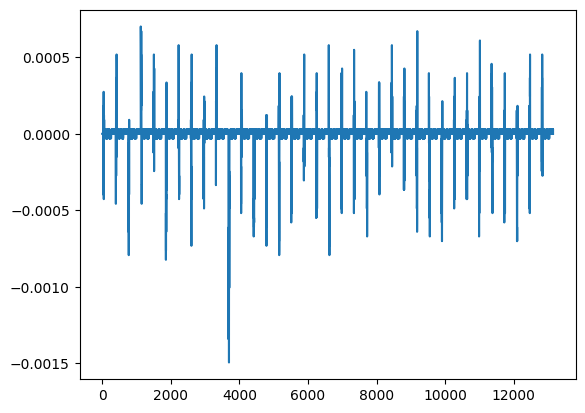

(0, 1)


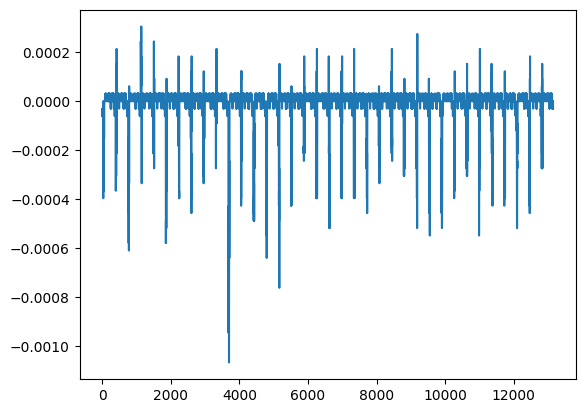

(1, 0)


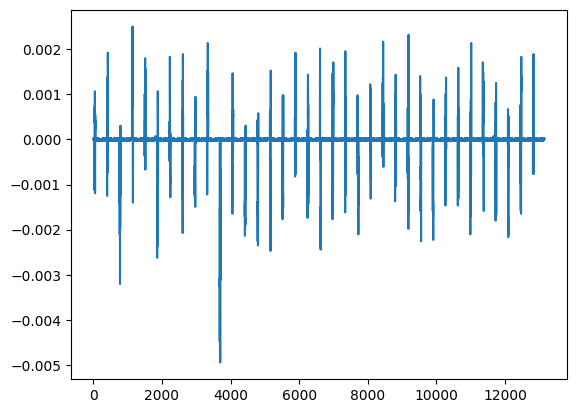

(1, 1)


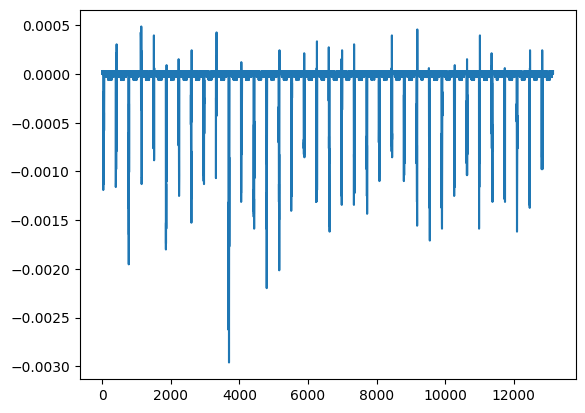

In [21]:
plots = []
for i in range(diff.shape[1]):
    for j in range(diff.shape[2]):
        print((i,j))
        plt.plot(list(range(diff.shape[0])), diff[:, i, j])
        plt.show()
        


In [22]:
debiased_values_isimip[np.argmax(diff)]

array([[301.59677, 303.86508],
       [301.6364 , 303.7763 ]], dtype=float32)

In [19]:
np.max(debiased_values_isimip)

310.83627

In [234]:
debiaser

ISIMIP(distribution=<scipy.stats._continuous_distns.norm_gen object at 0x7fc44eeaaeb0>, trend_preservation_method='additive', detrending=True, reasonable_physical_range=[0, 400], variable='tas', lower_bound=-inf, lower_threshold=-inf, upper_bound=inf, upper_threshold=inf, trend_removal_with_significance_test=True, trend_transfer_only_for_values_within_threshold=True, event_likelihood_adjustment=False, ecdf_method='linear_interpolation', iecdf_method='linear', running_window_mode=False, running_window_length=31, running_window_step_length=1)

In [243]:
#def map_arguments_to_isimip_command_line_ones(debiaser):

def map_distribution_to_name(distribution):
    if distribution == scipy.stats.norm:
        return "normal"
    elif distribution == scipy.stats.gamma:
        return "gamma"
    else:
        raise ValueError("Unknown distribution")

def map_to_none_if_inf_else_value(value):
    if np.isinf(value):
        return None
    else:
        return value

def run_isimip_from_debiaser(debiaser, data_path = "isimip3basd-master/data/", data_path_debiased_models = "isimip3basd-master/data/debiased_models/"):
    arguments = {
        "n-processes": 5,
        "randomization-seed": 0
        "variable": debiaser.variable,
        "distribution": map_distribution_to_name(debiaser.distribution),
        "trend-preservation": debiaser.trend_preservation_method,
        "detrend": int(debiaser.detrending),
        "halfwin-upper-bound-climatology": 0,
        "lower-bound": map_to_none_if_inf_else_value(debiaser.lower_bound),
        "lower-threshold": map_to_none_if_inf_else_value(debiaser.lower_threshold),
        "upper-bound": map_to_none_if_inf_else_value(debiaser.upper_bound),
        "upper-threshold": map_to_none_if_inf_else_value(debiaser.upper_threshold),
        "unconditional-ccs-transfer": 1-int(debiaser.trend_transfer_only_for_values_within_threshold),
        "adjust-p-values" : int(debiaser.event_likelihood_adjustment),
        "halfwin-upper-bound-climatology": 0,
        "max-change-factor": 10000.,
        "max-adjustment-factor": 10000.,
        "step-size": debiaser.running_window_step_length if debiaser.running_window_mode else 0,
        "o": data_path+debiaser.variable+"_obs-hist_coarse_1979-2014.nc",
        "s": data_path+debiaser.variable+"_sim-hist_coarse_1979-2014.nc",
        "f": data_path+debiaser.variable+"_sim-fut_coarse_2065-2100.nc",
        "b": data_path_debiased_models+debiaser.variable+"_sim-fut-basd_coarse_2065-2100.nc",
        "n-quantiles": 15000
        
    }
    
    call = """python -u isimip3basd-master/code/bias_adjustment.py \
                --n-processes {n-processes} \
                --randomization-seed {randomization-seed} \
                --variable {variable} \
                --distribution {distribution} \
                --trend-preservation {trend-preservation} \
                --detrend {detrend} \
                --halfwin-upper-bound-climatology {halfwin-upper-bound-climatology} \
                --lower-bound {lower-bound} \
                --lower-threshold":
                --upper-bound": 
                "--upper-threshold": 
                unconditional-ccs-transfer":,
                "adjust-p-values" : ,
                "halfwin-upper-bound-climatology": 0,
                "max-change-factor": 10000.,
                "max-adjustment-factor": 10000.,
                -o {o} \
                -s {s} \
                -f {f} \
                -b {b} \
                --n-quantiles {n-quantiles} #\
                #--max-change-factor 10000. \
                #--max-adjustment-factor 10000.
                #--adjust-p-values 1
                #--if-all-invalid-use \
                #--trendless-bound-frequency \
                #--lower-bound , 0.\
                #--lower-threshold , 0.1 \
                #--upper-bound , \
                #--upper-threshold , \
                #--unconditional-ccs-transfer\
                #--step-size 1 \

    
    """



{'variable': 'tas',
 'distribution': 'normal',
 'trend-preservation': 'additive',
 'lower-bound': None,
 'lower-threshold': None,
 'upper-bound': None,
 'upper-threshold': None,
 'unconditional-ccs-transfer': 0,
 'adjust-p-values': 0,
 'halfwin-upper-bound-climatology': 0,
 'max-change-factor': 10000.0,
 'max-adjustment-factor': 10000.0,
 'step-size': 0}

In [ ]:
--n-processes 5 \
--randomization-seed 0 \
--variable tas \
--distribution normal \
--trend-preservation additive \
--detrend 1 \
--halfwin-upper-bound-climatology 0 \
-o isimip3basd-master/data/tas_obs-hist_coarse_1979-2014.nc \
-s isimip3basd-master/data/tas_sim-hist_coarse_1979-2014.nc \
-f isimip3basd-master/data/tas_sim-fut_coarse_2065-2100.nc \
-b isimip3basd-master/data/debiased_models/tas_sim-fut-basd_coarse_2065-2100.nc \
--n-quantiles 15000 #\
#--max-change-factor 10000. \
#--max-adjustment-factor 10000.
#--adjust-p-values 1
#--if-all-invalid-use \
#--trendless-bound-frequency \
#--lower-bound , 0.\
#--lower-threshold , 0.1 \
#--upper-bound , \
#--upper-threshold , \
#--unconditional-ccs-transfer\
#--step-size 1 \
